[1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
[5.72630425e-01 2.26113433e-02 1.27173786e-04 9.08091812e-06
 5.05540861e-06]


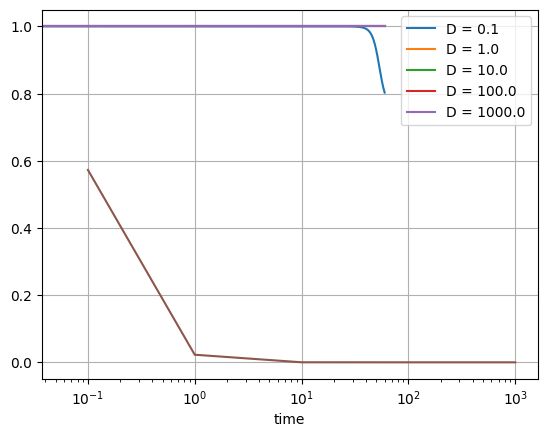

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random

def dose(y, t, b, s, c, p, i):
    target, infectious, virus = y
    dydt = [-b*target*virus, b*target*virus - s*infectious, (1/(i+1))*p*infectious - c*virus]
    return dydt


b = 0.00001
s = 4
c = 4
p = 2000000
D = np.logspace(-1, 3, 5)
mylist = []

y0 = [1, 0, 0.01]
t = np.linspace(0, 60, 1000)
for i in D:
    sol = odeint(dose, y0, t, args=(b, s, c, p, i))
    plt.plot(t, sol[:, 0], label='D = ' + str(i))
    V = sol[:, 2]
    mylist.append(V[48]/0.01950269536785707)


def add_noise(d, noise_pct):
    return [x + random.gauss(0, noise_pct * x) for x in d]

mat = np.array(mylist)

mylist2 = add_noise(mylist, 0.05)
mat2 = np.array(mylist2)
plt.plot(D, mat2)

plt.xscale('log')
#plt.plot(t, sol[:, 2], 'r', label='virus')
plt.legend(loc='best')
plt.xlabel('time')
plt.grid()
#plt.show()
print(D)
print(mat2)